In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\ankit\\Downloads\\bitcoin.csv")
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [3]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.set_index('Date',inplace=True)
df.head()

,Price
Date,
2019-05-23,7881.846680
2019-05-24,7987.371582
2019-05-25,8052.543945
2019-05-26,8673.215820
2019-05-27,8805.778320


<AxesSubplot:xlabel='Date'>

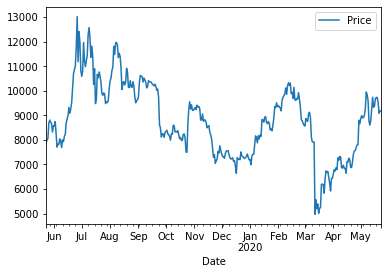

In [6]:
df.plot()

In [7]:
### Testing For Stationarity 
from statsmodels.tsa.stattools import adfuller

In [8]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result=adfuller(Price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

In [9]:
adfuller_test(df['Price'])

ADF Test Statistic : -2.476735941197219
p-value : 0.12123781073112527
#Lags Used : 0
Number of Observations Used : 366
Data is non-stationary 


In [10]:
## For converting non stationary to stationary data
df['Price Difference'] = df['Price'] - df['Price'].shift(1)
df['Price Difference']

Date
2019-05-23           NaN
2019-05-24    105.524902
2019-05-25     65.172363
2019-05-26    620.671875
2019-05-27    132.562500
                 ...    
2020-05-19      2.462891
2020-05-20   -206.056641
2020-05-21   -441.219726
2020-05-22    100.815429
2020-05-23     -2.531250
Name: Price Difference, Length: 367, dtype: float64

In [11]:
df.head(10)

,Price,Price Difference
Date,,
2019-05-23,7881.846680,NaN
2019-05-24,7987.371582,105.524902
2019-05-25,8052.543945,65.172363
2019-05-26,8673.215820,620.671875
2019-05-27,8805.778320,132.562500
2019-05-28,8719.961914,-85.816406
2019-05-29,8659.487305,-60.474609
2019-05-30,8319.472656,-340.014649
2019-05-31,8574.501953,255.029297


In [12]:
## Again test dickey fuller test
adfuller_test(df['Price Difference'].dropna())

ADF Test Statistic : -20.687835710726933
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 365
Data is stationary


<AxesSubplot:xlabel='Date'>

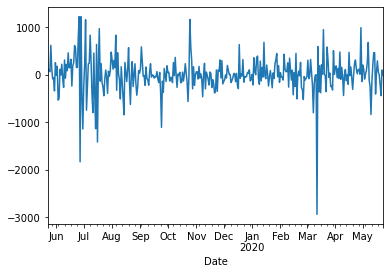

In [13]:
df['Price Difference'].plot()

In [14]:
df['Seasonal Difference']=df['Price']-df['Price'].shift(12)

In [15]:
adfuller_test(df['Seasonal Difference'].dropna())

ADF Test Statistic : -4.5008407189107045
p-value : 0.000195953225031622
#Lags Used : 17
Number of Observations Used : 337
Data is stationary


<AxesSubplot:xlabel='Date'>

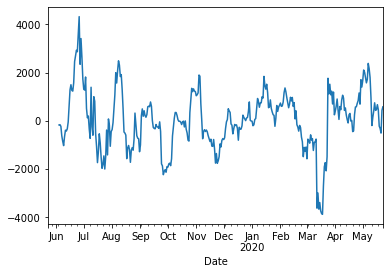

In [16]:
df['Seasonal Difference'].plot()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


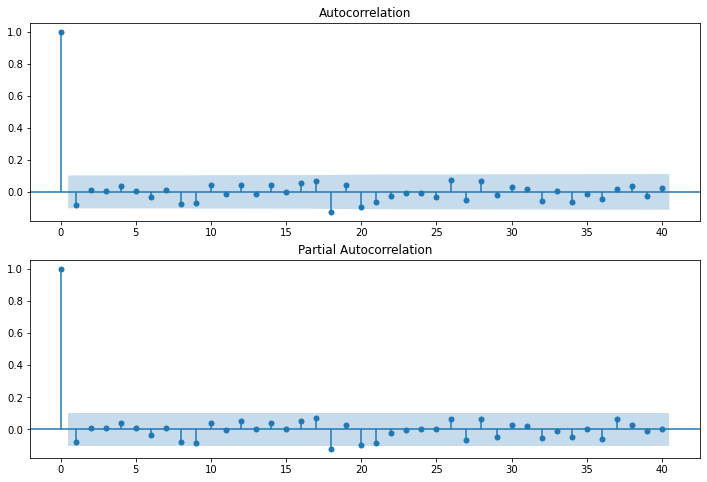

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Price Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Price Difference'].dropna(),lags=40,ax=ax2)

In [19]:
# p=0, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [20]:
model=ARIMA(df['Price'],order=(5,2,2))
model_fit=model.fit()

C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

In [21]:
df.shape

(367, 3)

<AxesSubplot:xlabel='Date'>

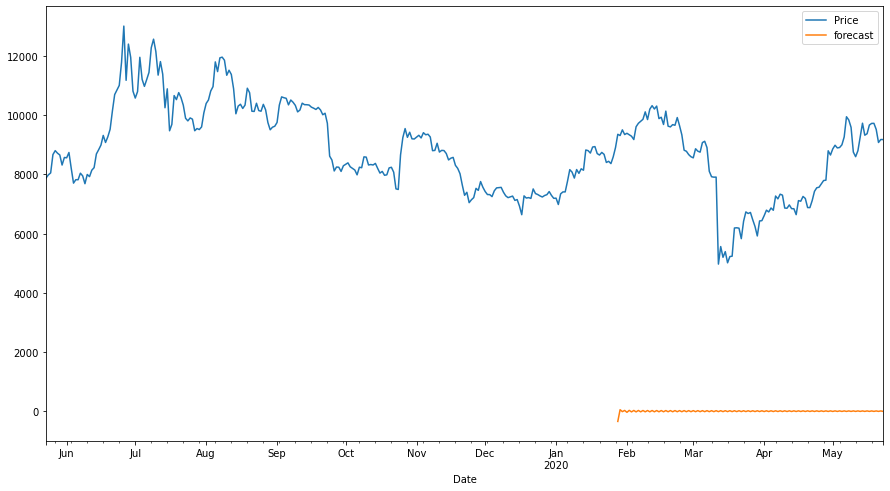

In [22]:
df['forecast']=model_fit.predict(start=250,end=450,dynamic=True)
df[['Price','forecast']].plot(figsize=(15,8))

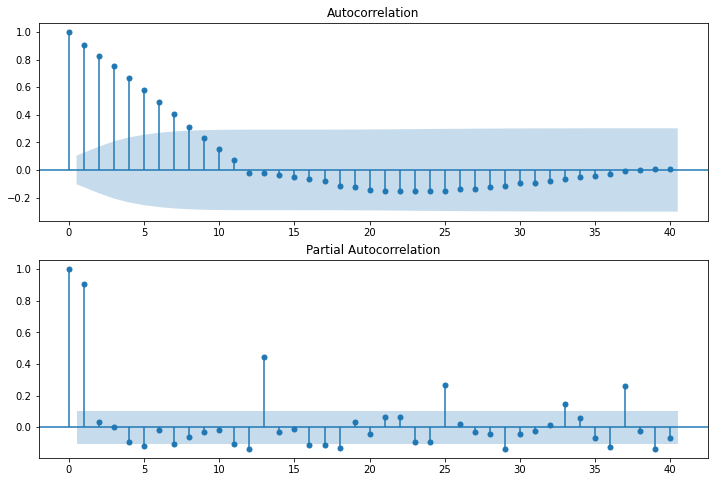

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Difference'].dropna(),lags=40,ax=ax2)

In [24]:
import statsmodels.api as sm

In [25]:
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(1, 2, 1),seasonal_order=(1,2,1,12))
results=model.fit()

C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Date'>

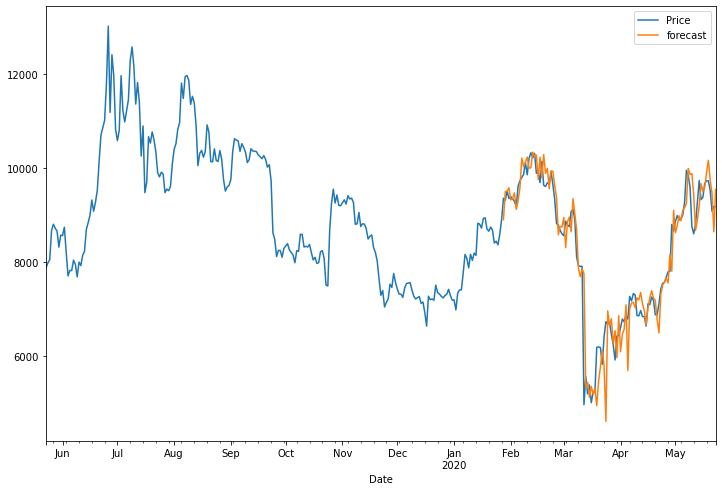

In [26]:
df['forecast']=results.predict(start=250,end=403,dynamic=False)
df[['Price','forecast']].plot(figsize=(12,8))

In [33]:
df.index

DatetimeIndex(['2019-05-23', '2019-05-24', '2019-05-25', '2019-05-26',
               '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
               '2019-05-31', '2019-06-01',
               ...
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23'],
              dtype='datetime64[ns]', name='Date', length=367, freq=None)

In [27]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [32]:
future_dates

[Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-06-23 00:00:00'),
 Timestamp('2020-07-23 00:00:00'),
 Timestamp('2020-08-23 00:00:00'),
 Timestamp('2020-09-23 00:00:00'),
 Timestamp('2020-10-23 00:00:00'),
 Timestamp('2020-11-23 00:00:00'),
 Timestamp('2020-12-23 00:00:00'),
 Timestamp('2021-01-23 00:00:00'),
 Timestamp('2021-02-23 00:00:00'),
 Timestamp('2021-03-23 00:00:00'),
 Timestamp('2021-04-23 00:00:00'),
 Timestamp('2021-05-23 00:00:00'),
 Timestamp('2021-06-23 00:00:00'),
 Timestamp('2021-07-23 00:00:00'),
 Timestamp('2021-08-23 00:00:00'),
 Timestamp('2021-09-23 00:00:00'),
 Timestamp('2021-10-23 00:00:00'),
 Timestamp('2021-11-23 00:00:00'),
 Timestamp('2021-12-23 00:00:00'),
 Timestamp('2022-01-23 00:00:00'),
 Timestamp('2022-02-23 00:00:00'),
 Timestamp('2022-03-23 00:00:00'),
 Timestamp('2022-04-23 00:00:00')]

In [28]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [29]:
future_df=pd.concat([df,future_datest_df])

In [30]:
future_df

,Price,Price Difference,Seasonal Difference,forecast
2019-05-23,7881.846680,NaN,NaN,NaN
2019-05-24,7987.371582,105.524902,NaN,NaN
2019-05-25,8052.543945,65.172363,NaN,NaN
2019-05-26,8673.215820,620.671875,NaN,NaN
2019-05-27,8805.778320,132.562500,NaN,NaN
...,...,...,...,...
2021-12-23,NaN,NaN,NaN,NaN
2022-01-23,NaN,NaN,NaN,NaN
2022-02-23,NaN,NaN,NaN,NaN
2022-03-23,NaN,NaN,NaN,NaN


<AxesSubplot:>

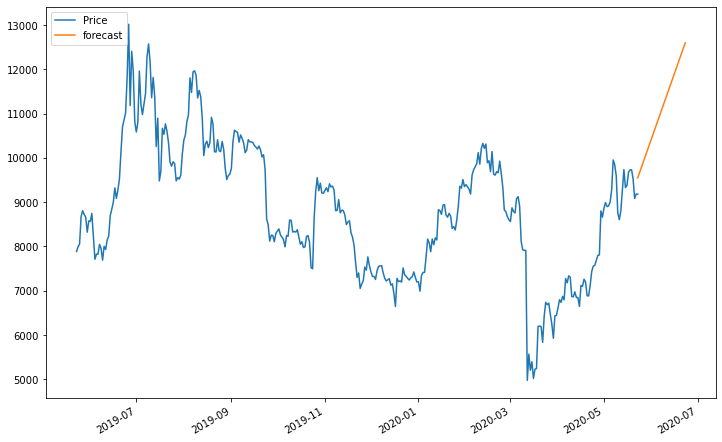

In [31]:
future_df['forecast'] = results.predict(start = 366, end = 420, dynamic=True)  
future_df[['Price', 'forecast']].plot(figsize=(12, 8))